In [3]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

In [4]:
#!pip install seaborn

In [5]:
def draw_network_colored(g, p, centrality):
    plt.figure(figsize = (20,10))
    nx.draw_networkx(g,
                     pos=p,
                    
                     font_size = 12, 
                     font_weight = 'bold',
                     font_color = 'plum',
                     edge_color = 'grey'
                    )
    
    nodes = nx.draw_networkx_nodes(g, p,cmap=plt.get_cmap('Blues') ,node_color=[c for c in centrality.values()],
                     node_size = 300,
                     )
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()

In [6]:
g = nx.DiGraph()
g.add_edges_from([(1,2),
                 (1,3),
                 #(1,4),
                 (5,1),
                 (1,6),
                 (2,5),
                 (5,4),
                 (3,5),
                  
                 (3,4),
                 (7,3),
                 (2,6),
                 (4,7),
                 (5,6),
                 (5,7),
                 (6,7),
                 (6,8),
                  #(6,11),(6,12),
                 (7,8),
                  (8,9),(9,10),(10,11),(12,10),(10,13),(10,14),(10,15),(15,12)
                 ])

In [7]:
print(g)
posizione = nx.planar_layout(g)

DiGraph with 15 nodes and 24 edges


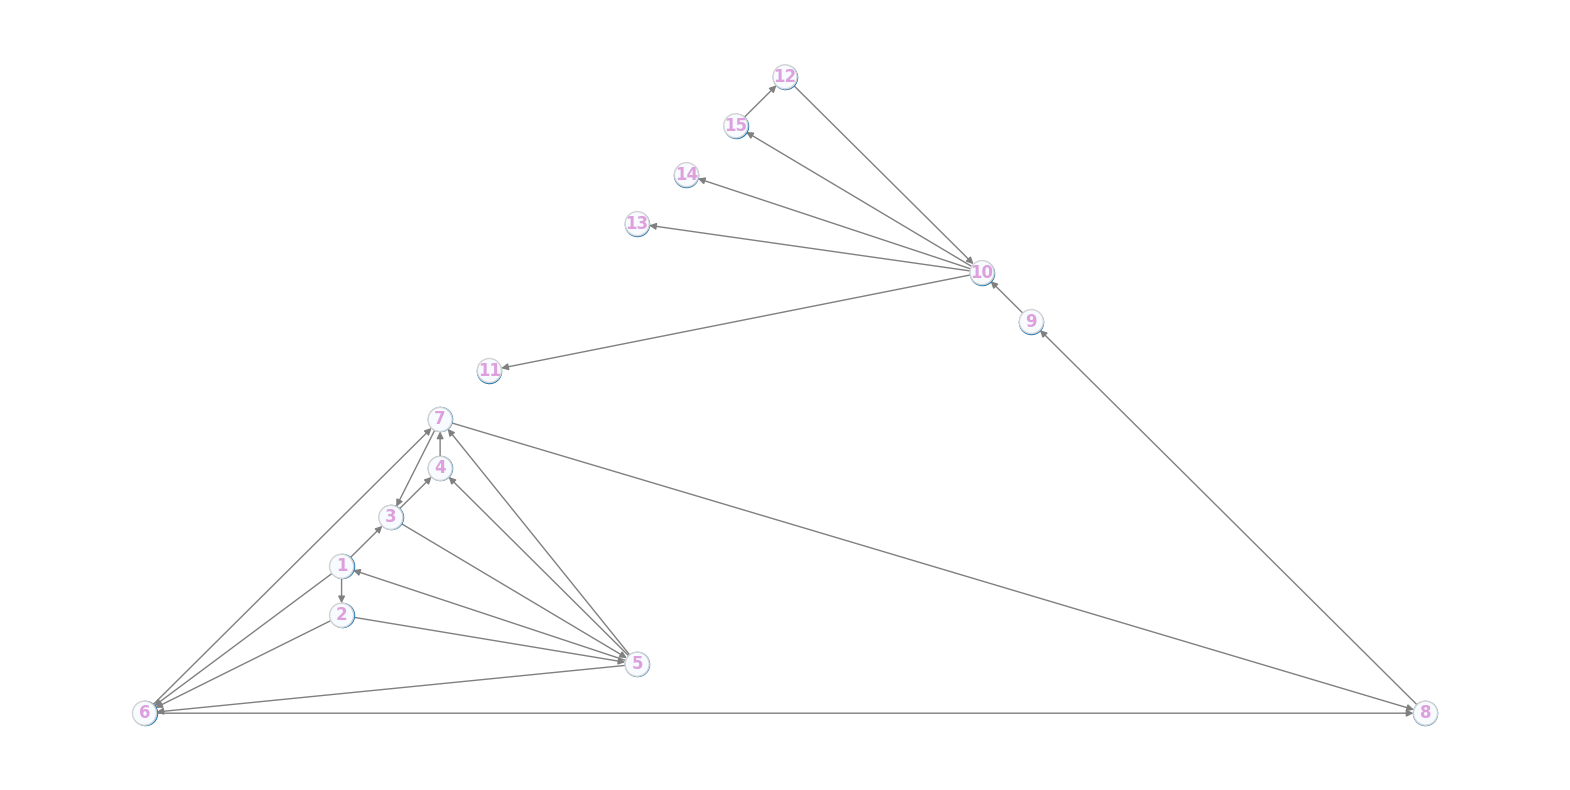

In [8]:
draw_network_colored(g, posizione, {i:0 for i in g.nodes()})

# Connectivity
* ``nx.is_connected(G)`` ---> restituisce True se il grafo è connesso, False altrimenti 
* ``nx.number_connected_components(G)`` --> restituisce il numero di componenti connesse
* ``nx.connected_components(G)`` --> restituisce le componenti connesse 
* ``node_connected_component(G, n)`` --> restituisce il set di nodi nella componente connessa del nodo `n`

## weakly connected
-non considera la direzione, se non ci sono sotttografi separati è sempre un'unica componente-

In [9]:
print(nx.is_weakly_connected(g))
print(nx.number_weakly_connected_components(g))

True
1


In [10]:
largest_cc = max(nx.weakly_connected_components(g), key=len)
print(largest_cc)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


In [11]:
[len(c) for c in nx.weakly_connected_components(g)]

[15]

## strongly connected
-un nodo in una componente connessa deve poter raggiungere tutti gli altri nodi, non importa quanto sia lungo il path-

In [ ]:
print(nx.is_strongly_connected(g))
print(nx.number_strongly_connected_components(g))

False
7


In [ ]:
largest_cc = max(nx.strongly_connected_components(g), key=len)
print(largest_cc)

{1, 2, 3, 4, 5, 6, 7}


In [ ]:
list(nx.strongly_connected_components(g))

[{11}, {13}, {14}, {10, 12, 15}, {9}, {8}, {1, 2, 3, 4, 5, 6, 7}]

In [ ]:
[len(c) for c in nx.strongly_connected_components(g)]

[1, 1, 1, 3, 1, 1, 7]

# esempio rete reale: UC-social http://konect.cc/networks/opsahl-ucforum/




In [12]:
Uc = nx.read_graphml('./data/ucsocial_directed.graphml')

In [13]:
print(Uc)

DiGraph with 1899 nodes and 20296 edges


In [14]:
print(nx.is_strongly_connected(Uc))
print(nx.number_strongly_connected_components(Uc))

False
601


In [15]:
largest_cc = max(nx.strongly_connected_components(Uc), key=len)
print(len(largest_cc)/Uc.order())

0.6814112690889942


nella visualizzazione, i nodi sono colorati in base all'apartenenza ad una componente connessa, si vede che sono praticamente tutti in quella più grande

<img src="uc-social-draw.png" alt="-" style="width: 500px;"/>

In [16]:
sorted([len(c) for c in nx.strongly_connected_components(Uc)], reverse = True)[:10]

[1294, 2, 2, 2, 2, 2, 1, 1, 1, 1]

# data preparation per gephi
__dobbiamo aggiungere come attribute sui nodi l'indice della componente a cui appartiene!__ <br>
guardiamo l'esempio del toy

In [17]:
list(nx.strongly_connected_components(g))

[{11}, {13}, {14}, {10, 12, 15}, {9}, {8}, {1, 2, 3, 4, 5, 6, 7}]

In [18]:
attribute_component = {}
for i,component in enumerate(nx.strongly_connected_components(g)):
    for node in component: attribute_component[node] = i
    
attribute_component

{11: 0,
 13: 1,
 14: 2,
 10: 3,
 12: 3,
 15: 3,
 9: 4,
 8: 5,
 1: 6,
 2: 6,
 3: 6,
 4: 6,
 5: 6,
 6: 6,
 7: 6}

In [19]:
attribute_component = {}
for i,component in enumerate(nx.strongly_connected_components(Uc)):
    for node in component: attribute_component[node] = i


In [20]:
nx.set_node_attributes(Uc, attribute_component, 'component')

In [21]:
nx.write_gexf(Uc,'./data/ucsocial_directed_component.gexf')

# Esercizio

* scaricare i dati da https://networkrepository.com/email-dnc-corecipient.php
* costruire un grafo diretto
* rispondere alle seguenti domande:
    * il grafo è debolemnte connesso?
    * quante componenti (strong) ci sono?
    * che percentuali di nodi include la prima componente?
    * quante componenti servono per coprire l'70\% dei nodi?
    * quante componenti (strong) con solo un nodo ci sono?
    * possono esserci componenti weak con solo un nodo in Ge? ci sono?


In [57]:
edges = list(open('./data/email-dnc-corecipient.edges', 'r+'))
edges_ready = []
for e in edges[1:]:
    u,v,w = e.split()
    edges_ready.append((u,v))
gr = nx.DiGraph()
gr.add_edges_from(edges_ready)

#grafo debolmente connesso?
nx.is_weakly_connected(gr)
#Risposta: NO

#quante componenti (strong) ci sono?
print(nx.number_strongly_connected_components(gr))
#Risposta: 501

#che percentuali di nodi include la prima componente?
n = len(max(nx.weakly_connected_components(gr), key = len))
len(gr.nodes())/n
#Risposta: 501

#quante componenti servono per coprire l'70% dei nodi?

#Risposta: 501

#quante componenti (strong) con solo un nodo ci sono?

#Risposta: 501

#possono esserci componenti weak con solo un nodo in Ge? ci sono?

#Risposta: 501


501


1.0671378091872792

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3839abdf-1bdc-4eea-8193-68c122ccc4a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>